In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [38]:
x,y=datasets.make_blobs(n_samples=500,n_features=2,centers=2,random_state=0)

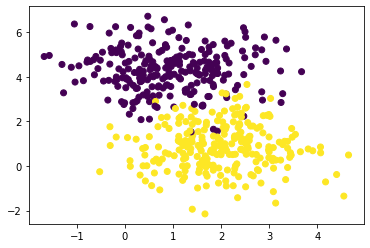

In [40]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [45]:
# normalizatio
means=x_train.mean(axis=0)
std=x_train.std(axis=0)

x_train=(x_train-means)/std

x_test=(x_test-means)/std

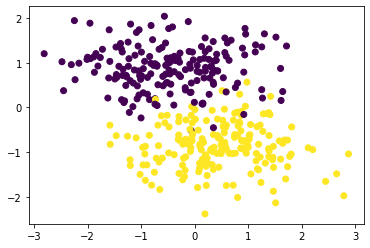

In [47]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [68]:
class Logisticregression:
    
    def __init__(self):
        self.w=0
    
    def sigmoid(self,z):
        return (1/(1+np.exp(-z)))
    
    def Hypo(self,x,w):
        
        if x.shape[1]!=w.shape[0]:
            b=np.ones((x.shape[0],1))
            x=np.hstack((x,b))
        
            
        z=np.dot(x,w)
        
        return self.sigmoid(z)
        
    
    def cost(self,x,y,w):
        y_=self.Hypo(x,w)
        
        return -1*(y*np.log(y_) + (1-y)*np.log(1-y_)).mean()
    
    def gradient(self,x,y,w):
        y_=self.Hypo(x,w)
        
        return -1*np.dot(x.T,y-y_)/(y.shape[0])
    def fit(self,x,y,learning_rate=0.6,itr=500):
        
        b=np.ones((x.shape[0],1))
        x=np.hstack((x,b))
        y=y.reshape((-1,1))
        
        w=np.zeros((x.shape[1],1))
        
        costs=[]
        for i in range(itr):
            c=self.cost(x,y,w)
            costs.append(c)
            
            grad=self.gradient(x,y,w)
            
            w=w-learning_rate*(grad)
            
        self.w=w
        return costs,w
        

In [69]:
Log_M=Logisticregression()

In [70]:
loss,w=Log_M.fit(x_train,y_train)

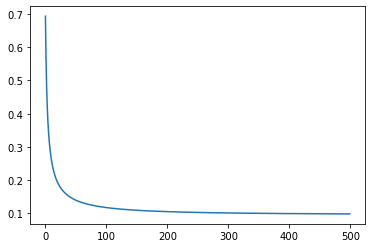

In [71]:
plt.plot(loss)
plt.show()

In [72]:
y_=Log_M.Hypo(x_test,w)

In [80]:
y_=(y_>=0.50)
y_

array([[ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [90]:
y_=y_.reshape((-1,))

In [96]:
for i in range(y_.shape[0]):
    if y_[i]==True:
        y_[i]=1
    else:
        y_[i]=0

In [98]:
(y_==y_test).sum()/(y_test.shape[0])

0.96